# Problem Statement : Build machine learning model to predict survived passengers based on different features like passengerid, survived,pclass, sex, age etc.

# Import required libraries

In [1]:
import pandas as pd  # For data analysis
import numpy as np  # For data analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns  # For data visualization
import warnings
warnings.filterwarnings('ignore') # Ignore warnings
from sklearn.linear_model import LogisticRegression # For logistic regression in machine learning
from sklearn.model_selection import train_test_split  # For seperating training and testing data

# Setting Path

In [2]:
cd C:\Data Science Docs\Python Docs\Python ML Projects\Project 4

C:\Data Science Docs\Python Docs\Python ML Projects\Project 4


# Data Exploration and Pre Processing

Load the given dataset

In [3]:
df = pd.read_csv('Titanic_Survival.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Print all the column names

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Describe the data

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check the null value

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

If there are Null values, Handle these

In [ ]:
# As there more then 30% null values we will just drop all null values

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


# Feature Encoding

In [11]:
# Ticket column has no relation with target column we are dropping that column
df.drop(['Ticket','Name'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S


In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# Perform Label Encoding on the object column
from sklearn.preprocessing import LabelEncoder

In [14]:
LE = LabelEncoder()

In [15]:
df[['Sex','Cabin','Embarked']] = df[['Sex','Cabin','Embarked']].apply(LE.fit_transform)
df[['Sex','Cabin','Embarked']]

,Sex,Cabin,Embarked
1,0,72,0
3,0,48,2
6,1,117,2
10,0,131,2
11,0,43,2
...,...,...,...
871,0,91,2
872,1,29,2
879,0,61,0
887,0,25,2


In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,0,38.0,1,0,71.2833,72,0
3,4,1,1,0,35.0,1,0,53.1000,48,2
6,7,0,1,1,54.0,0,0,51.8625,117,2
10,11,1,3,0,4.0,1,1,16.7000,131,2
11,12,1,1,0,58.0,0,0,26.5500,43,2
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,1,1,52.5542,91,2
872,873,0,1,1,33.0,0,0,5.0000,29,2
879,880,1,1,0,56.0,0,1,83.1583,61,0
887,888,1,1,0,19.0,0,0,30.0000,25,2


# Working with model

Create the target data and feature data where target data is survived

In [17]:
x = df.drop('Survived',axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,71.2833,72,0
3,4,1,0,35.0,1,0,53.1000,48,2
6,7,1,1,54.0,0,0,51.8625,117,2
10,11,3,0,4.0,1,1,16.7000,131,2
11,12,1,0,58.0,0,0,26.5500,43,2
...,...,...,...,...,...,...,...,...,...
871,872,1,0,47.0,1,1,52.5542,91,2
872,873,1,1,33.0,0,0,5.0000,29,2
879,880,1,0,56.0,0,1,83.1583,61,0
887,888,1,0,19.0,0,0,30.0000,25,2


In [18]:
y = df[['Survived']]
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


Split the data into Training and testing Set

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

Create a Logistic regression model for Target and feature data

In [20]:
LogR = LogisticRegression()

In [21]:
LogR.fit(x_train,y_train)

LogisticRegression()

In [22]:
LogR.score(x_train,y_train)

0.7876712328767124

In [23]:
LogR.score(x_test,y_test)

0.7027027027027027

In [24]:
y_pred = LogR.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

Display the Confusion Matrix

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [26]:
confusion_matrix(y_pred,y_test)

array([[ 8,  2],
       [ 9, 18]], dtype=int64)

Find the Accuracy Score

In [27]:
accuracy_score(y_pred,y_test)

0.7027027027027027

Find the Precision Score

In [28]:
precision_score(y_pred,y_test)

0.9

Find the Recall Score

In [29]:
recall_score(y_pred,y_test)

0.6666666666666666

Find the F1 Score

In [30]:
f1_score(y_pred,y_test)

0.7659574468085106

Find the probability of testing data

In [31]:
LogR.predict_proba(x_test)

array([[0.65550103, 0.34449897],
       [0.09036767, 0.90963233],
       [0.52196905, 0.47803095],
       [0.27338844, 0.72661156],
       [0.62031982, 0.37968018],
       [0.45352848, 0.54647152],
       [0.0668854 , 0.9331146 ],
       [0.35617546, 0.64382454],
       [0.25632944, 0.74367056],
       [0.56065397, 0.43934603],
       [0.14560342, 0.85439658],
       [0.43648539, 0.56351461],
       [0.58023153, 0.41976847],
       [0.04504303, 0.95495697],
       [0.59379507, 0.40620493],
       [0.31315694, 0.68684306],
       [0.5741338 , 0.4258662 ],
       [0.21262994, 0.78737006],
       [0.86229075, 0.13770925],
       [0.0227858 , 0.9772142 ],
       [0.58847093, 0.41152907],
       [0.36220187, 0.63779813],
       [0.33498919, 0.66501081],
       [0.05544333, 0.94455667],
       [0.08572199, 0.91427801],
       [0.2925209 , 0.7074791 ],
       [0.15570522, 0.84429478],
       [0.11750038, 0.88249962],
       [0.11741224, 0.88258776],
       [0.05021428, 0.94978572],
       [0.

Display ROC Curve and find the AUC score

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

Text(0, 0.5, 'True Positive Rate')

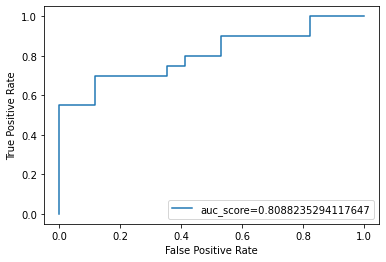

In [33]:
y_pred_proba = LogR.predict_proba(x_test)[::,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)
auc_score = roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label="auc_score="+str(auc_score))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")